In [1]:
import ast
import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','-','&'])

[nltk_data] Downloading package stopwords to /home/pahul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=pd.read_csv("companies_data.csv")

In [3]:
pros=df["Pros"].iloc[1]
pros = ast.literal_eval(pros)
pros=' '.join(pros)
pros=[i for i in nltk.word_tokenize(pros.lower()) if i not in stop] 
cleaned_sentence=" ".join(pros)
cleaned_sentence

'templates easy use team really loves open tracking helpful engagement logs email quickly accurately salesforce'

Refrence list for Tags: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [4]:
#tags result
tagged=nltk.pos_tag(pros)
tagged

[('templates', 'NNS'),
 ('easy', 'VBP'),
 ('use', 'NN'),
 ('team', 'NN'),
 ('really', 'RB'),
 ('loves', 'VBZ'),
 ('open', 'JJ'),
 ('tracking', 'VBG'),
 ('helpful', 'JJ'),
 ('engagement', 'JJ'),
 ('logs', 'NNS'),
 ('email', 'VBP'),
 ('quickly', 'RB'),
 ('accurately', 'RB'),
 ('salesforce', 'NN')]

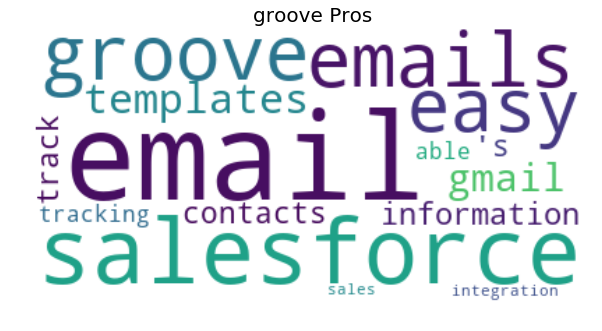

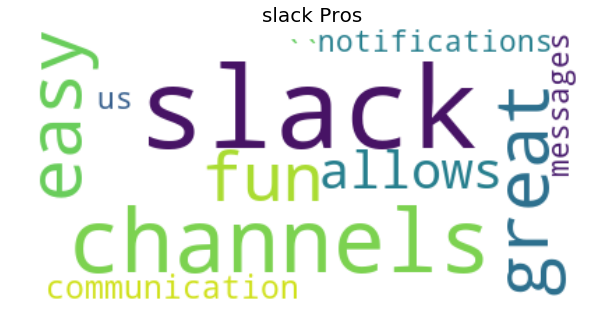

In [5]:
#word clound examples for identify key pros for groove
names=df["Company Name"].unique().tolist()
for name in names:
    company_data=list(df[df["Company Name"]==name]["Pros"])
    cleaned_sentence=""
    for itr in range(0,len(company_data)):
        pros = ast.literal_eval(company_data[itr])
        pros=' '.join(pros)
        pros=[i for i in nltk.word_tokenize(pros.lower()) if i not in stop] 
        cleaned_sentence=cleaned_sentence+" "+" ".join(pros)
    word_list=nltk.word_tokenize(cleaned_sentence)
    word_dicts={}
    for word in word_list:
        if word in word_dicts:
            word_dicts[word]=word_dicts[word]+1
        else:
            word_dicts[word]=1

    #removing words with frequency less than 5
    freq_data=pd.DataFrame.from_dict(word_dicts,orient='index')
    freq_data=freq_data[freq_data[0]>5]
    word_dicts=freq_data.to_dict()[0]


    wordcloud = WordCloud(background_color='white')
    wordcloud.generate_from_frequencies(word_dicts)
    plt.figure(figsize=(10,10))
    plt.title(name+ " Pros",fontsize=20)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()